## 文本的情绪计算
常见的文本分析，如情感分析，主要计算文本的积极情绪和消极情绪得分。

但是当文本中富含情绪，如喜怒哀乐等不同的情绪的时候，可以进行更细粒度的情绪分析。

今天使用两个数据
- 数据集 simplifyweibo_4_moods.csv
- 词典NRC词典， 包括喜怒哀乐等8种情绪

## 读取微博数据
simplifyweibo_4_moods.csv数据太大，咱们使用小样本small_simplifyweibo_4_moods.csv

In [91]:
import pandas as pd

df = pd.read_csv('small_simplifyweibo_4_moods.csv')
df.head()

,label,review
0,2,才五十一岁啊啊?????演员罗君左傍晚六时三十八分去世，终年51岁。
1,1,这个国家再对这些制造假冒伪劣食品药品的人手软的话，那后果真的会相当糟糕。坐牢？从快判个死刑得...
2,0,4關 注我的个唱海报大图集明天会在各大网站抛出，敬请关注
3,0,奇迹啊。最牛的卧铺车厢
4,0,看妙处，少女江边洗衣裳，沙滩妪 童晒苕干。江横小舟客争渡，老翁搬石垒梯田。少妇背孺 挖红薯，...



查看四种情绪的分布情况

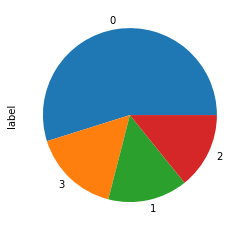

In [37]:
import matplotlib.pyplot as plt
df.label.value_counts().plot(kind='pie')
plt.show()

## NRC词典
其中NRC词典为加拿大国家研究委员会信息技术研究所(Institute for Information Technology, National Research Council Canada. )组织制作的基于众包方式标注出的词典。   

https://www.saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm

参考文献
>Mohammad, Saif M., and Peter D. Turney. "Crowdsourcing a word–emotion association lexicon." Computational Intelligence 29, no. 3 (2013): 436-465.

下面我们读取 NRC-Emotion-Lexicon-v0.92-InManyLanguages-web.xlsx

In [92]:
import pandas as pd


lexion_df = pd.read_excel('NRC-Emotion-Lexicon-v0.92-InManyLanguages-web.xlsx')
lexion_df.head()

,English Word,Arabic Translation (Google Translate),Basque Translation (Google Translate),Bengali Translation (Google Translate),Catalan Translation (Google Translate),Chinese (simplified) Translation (Google Translate),Chinese (traditional) Translation (Google Translate),Danish Translation (Google Translate),Dutch Translation (Google Translate),Esperanto Translation (Google Translate),...,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,aback,الى الوراء,aback,পশ্চাতে,darrere,吓了一跳,嚇了一跳,overrasket,verrast,surprizita,...,0,0,0,0,0,0,0,0,0,0
1,abacus,طبلية تاج,abako,গণনা-যন্ত্রবিশেষ,àbac,算盘,算盤,abacus,abacus,abako,...,0,0,0,0,0,0,0,0,0,1
2,abandon,تخلى,alde batera utzi,বর্জিত করা,abandonar,放弃,放棄,opgive,verlaten,forlasos,...,0,1,0,0,0,1,0,1,0,0
3,abandoned,مهجور,abandonatu,পরিত্যক্ত,abandonat,弃,棄,forladte,verlaten,forlasita,...,0,1,1,0,0,1,0,1,0,0
4,abandonment,هجر,abandono,বিসর্জন,abandonament,放弃,放棄,opgivelse,verlatenheid,forlasas,...,0,1,1,0,0,1,0,1,1,0


### 支持的语言
支持41种语言，包括
- 英语
- 法语
- 阿拉伯语
- 德语
- 俄罗斯语
- 中文(简体、繁体)

英文是标注的，其他语言是根据google tranlate将对应的英文翻译为其他语言。

In [39]:
lexion_df.columns

Index(['English Word', 'Arabic Translation (Google Translate)',
       'Basque Translation (Google Translate)',
       'Bengali Translation (Google Translate)',
       'Catalan Translation (Google Translate)',
       'Chinese (simplified) Translation (Google Translate)',
       'Chinese (traditional) Translation (Google Translate)',
       'Danish Translation (Google Translate)',
       'Dutch Translation (Google Translate)',
       'Esperanto Translation (Google Translate)',
       'Finnish Translation (Google Translate)',
       'French Translation (Google Translate)',
       'German Translation (Google Translate)',
       'Greek Translation (Google Translate)',
       'Gujarati Translation (Google Translate)',
       'Hebrew Translation (Google Translate)',
       'Hindi Translation (Google Translate)',
       'Irish Translation (Google Translate)',
       'Italian Translation (Google Translate)',
       'Japanese Translation (Google Translate)',
       'Latin Translation (Google Tr

### 中文情绪词典抽取

In [93]:
chinese_df = lexion_df[['Chinese (simplified) Translation (Google Translate)', 'Positive', 'Negative', 
                 'Anger','Anticipation', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Trust']]
chinese_df.head()

,Chinese (simplified) Translation (Google Translate),Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,吓了一跳,0,0,0,0,0,0,0,0,0,0
1,算盘,0,0,0,0,0,0,0,0,0,1
2,放弃,0,1,0,0,0,1,0,1,0,0
3,弃,0,1,1,0,0,1,0,1,0,0
4,放弃,0,1,1,0,0,1,0,1,1,0



构建情感词列表

In [41]:
Positive = []
Negative = []
Anger = []
Anticipation = []
Disgust = []
Fear = []
Joy = []
Sadness = []
Surprise = []
Trust = []
for idx, row in chinese_df.iterrows():
    if row['Positive']==1:
        Positive.append(row['Chinese (simplified) Translation (Google Translate)'])
    if row['Negative']==1:
        Negative.append(row['Chinese (simplified) Translation (Google Translate)'])
    if row['Anger']==1:
        Anger.append(row['Chinese (simplified) Translation (Google Translate)'])
    if row['Anticipation']==1:
        Anticipation.append(row['Chinese (simplified) Translation (Google Translate)'])
    if row['Disgust']==1:
        Disgust.append(row['Chinese (simplified) Translation (Google Translate)'])
    if row['Fear']==1:
        Fear.append(row['Chinese (simplified) Translation (Google Translate)'])
    if row['Joy']==1:
        Joy.append(row['Chinese (simplified) Translation (Google Translate)'])
    if row['Sadness']==1:
        Sadness.append(row['Chinese (simplified) Translation (Google Translate)'])
    if row['Surprise']==1:
        Surprise.append(row['Chinese (simplified) Translation (Google Translate)'])
    if row['Trust']==1:
        Trust.append(row['Chinese (simplified) Translation (Google Translate)'])
  
print('词语列表构建完成')

词语列表构建完成


### 设计情绪计算函数

In [56]:
import jieba
import time


def emotion_caculate(text):
    positive = 0
    negative = 0
    anger = 0
    anticipation = 0
    disgust = 0
    fear = 0
    joy = 0
    sadness = 0
    surprise = 0
    trust = 0
    
    wordlist = jieba.lcut(text)
    wordset = set(wordlist)
    wordfreq = []
    for word in wordset:
        freq = wordlist.count(word)
        if word in Positive:
            positive+=freq
        if word in Negative:
            negative+=freq
        if word in Anger:
            anger+=freq  
        if word in Anticipation:
            anticipation+=freq
        if word in Disgust:
            disgust+=freq
        if word in Fear:
            fear+=freq
        if word in Joy:
            joy+=freq
        if word in Sadness:
            sadness+=freq
        if word in Surprise:
            surprise+=freq
        if word in Trust:
            trust+=freq
            
    emotion_info = {
        'positive': positive,
        'negative': negative,
        'anger': anger,
        'anticipation': anticipation,
        'disgust': disgust,
        'fear':fear,
        'joy':joy,
        'sadness':sadness,
        'surprise':surprise,
        'trust':trust,
        'length':len(wordlist)
    }
    indexs = ['length', 'positive', 'negative', 'anger', 'anticipation','disgust','fear','joy','sadness','surprise','trust']
    return pd.Series(emotion_info, index=indexs)
        


In [57]:
emotion_caculate(text='这个国家再对这些制造假冒伪劣食品药品的人手软的话，那后果真的会相当糟糕。坐牢？从快判个死刑')

length          25
positive         1
negative         2
anger            1
anticipation     0
disgust          1
fear             1
joy              0
sadness          1
surprise         0
trust            2
dtype: int64

In [94]:
start = time.time()   
#df['review']整体为series类型。
#series有apply方法
emotion_df = df['review'].apply(emotion_caculate)
end = time.time()
print(end-start)
emotion_df.head()

15.623496055603027


,length,positive,negative,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
0,23,0,0,0,0,0,0,0,0,0,0
1,100,2,3,2,0,1,1,2,2,1,4
2,20,1,0,0,2,0,0,1,1,0,1
3,7,1,0,0,1,0,0,1,0,1,1
4,54,3,0,0,1,0,1,0,0,0,0



series数据变为dataframe，详情可了解下apply   http://dwz.date/dzB

### 输出分析结果
将原始数据与分析结果合并, 输出到新的csv中。

In [95]:
output_df = pd.concat([df, emotion_df], axis=1)
output_df.to_csv('output.csv', index=False)
output_df.head()

,label,review,length,positive,negative,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
0,2,才五十一岁啊啊?????演员罗君左傍晚六时三十八分去世，终年51岁。,23,0,0,0,0,0,0,0,0,0,0
1,1,这个国家再对这些制造假冒伪劣食品药品的人手软的话，那后果真的会相当糟糕。坐牢？从快判个死刑得...,100,2,3,2,0,1,1,2,2,1,4
2,0,4關 注我的个唱海报大图集明天会在各大网站抛出，敬请关注,20,1,0,0,2,0,0,1,1,0,1
3,0,奇迹啊。最牛的卧铺车厢,7,1,0,0,1,0,0,1,0,1,1
4,0,看妙处，少女江边洗衣裳，沙滩妪 童晒苕干。江横小舟客争渡，老翁搬石垒梯田。少妇背孺 挖红薯，...,54,3,0,0,1,0,1,0,0,0,0


 ### 检查
我们查看一下随机抽查一下，看看
- 最fear
- 最positive
- 最negative
的分别是什么内容
         

In [96]:
fear = output_df.sort_values(by='fear',ascending=False)
fear.head()

,label,review,length,positive,negative,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
1963,3,"selina T .T 继续祈祷，吉人自有天相!: 三度灼伤,受伤部位主要是手,脚以及背部，...",123,10,8,5,8,4,14,5,8,9,11
1422,2,神哪，为什么咧~ ~ ~ 难道我要一辈子工作狂下去么。。。【12星座内心依赖症】★白羊—工作...,87,5,12,0,12,0,14,1,12,0,14
1844,0,这个图原来这么熟悉！我一条都没有。原来有一种病叫“恋爱恐惧症”，你有吗？症状一:怕爱上别人症...,111,9,28,4,3,1,13,9,5,2,4
17,0,"找到什么是你最真正在乎的工作了吗？"" 将精力投入于真正在乎的工作。"" ......JK 罗琳...",116,8,11,10,8,8,8,1,8,1,5
461,0,最爱交朋友。。。。朋友满天下择偶条件最高...难怪我现在还十二星座之最！【十二星座之最】白羊...,121,11,6,0,5,1,8,7,2,3,6


In [84]:
#这是什么鬼
fear = output_df.sort_values(by='fear',ascending=False)
print(fear.iloc[0, :]['review'])

神哪，为什么咧~ ~ ~ 难道我要一辈子工作狂下去么。。。【12星座内心依赖症】★白羊—工作依赖★金牛—味觉依赖★双子—用脑依赖★巨蟹—收藏依赖★狮子—争夺依赖★处女—清洁依赖★天秤—交友依赖★天蝎—身体依赖★射手—跳槽依赖★魔羯 —自我批评依赖★水瓶—友情依赖★双鱼—伤情依赖


In [86]:
negative = output_df.sort_values(by='negative',ascending=False)
print(negative.iloc[0, :]['review'])

这个图原来这么熟悉！我一条都没有。原来有一种病叫“恋爱恐惧症”，你有吗？症状一:怕爱上别人症状二:怕爱上别人后会深陷症状三:怕受伤症状四:怕被拒绝症状五:怕在最爱的当下失去症状六:怕恋爱让人失去自我症状七:怕伤害别人症状八:怕自己丢失一颗爱自由的心症状九:怕恋爱后再也回不到以前症状十:怕自己爱对方比对方爱自己还多


In [88]:
positive = output_df.sort_values(by='positive',ascending=False)
print(positive.iloc[0, :]['review'])

《劳动合同法》确有荒诞之处，但就此认为中国经济必须继续依靠廉价劳动力，就更荒诞了。提高劳动力价格，会使不少企业不堪成本破产，继而减少工作岗位，最终对劳动者不利。但关键不在继续压低劳动力价格，而在减轻企业别的负担：沉重税收各项收费政策不公承担本该ZF 承担的责“《劳动合同法》实施之前，集团公司请了一位劳动法专家给我们讲课，这位专家自己也有一家小公司。专家痛心疾首地说，劳动力价格便宜是中国最大的核心竞争力，都像劳动合同法这样瞎搞，这个优势很快就会不复存在，中国的经济发展必将受到阻碍。”


最正面的不太对啊，再看看第二最positive的

In [89]:
positive = output_df.sort_values(by='positive',ascending=False)
print(positive.iloc[1, :]['review'])

真正懂得欣赏美味的人，一定是懂得生活的人。谢谢老师的分享，遇见一本优雅诚恳的好书是我们的幸运，也欢迎你多分享旅途中的精神食粮给大家！中信书店正策划一系列美味文化的活动，有机会真诚邀请叶老师一起合作哦！呵～發 現 有書 店微博今天選 讀 我的《極 致之味》。感謝 了！美味。葡萄酒要伊甘酒庄还是玛歌酒庄？火腿是西班牙的伊比利火腿，还是意大利吉贝罗火腿？盐用布列塔尼盖朗地区的盐之花，还是冲绳的粟国之盐？《极致之味》中会告诉你如何一层层抽丝剥茧地追索视觉嗅觉味觉触觉上每一分毫的微妙变化。


分析结束

### tips:
使用这个NRC，最好是英文数据，毕竟是用英文数据英文场景英语母语者标注的情绪词典。其他语言虽然能进行情绪分析，但因为是从英文中翻译过来的，存在一定的问题